In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/bangla-newspaper-dataset/data_v2/data_v2.json
/kaggle/input/bangla-newspaper-dataset/data/data.json


# New Section

In [2]:
import json
with open(file='/kaggle/input/bangla-newspaper-dataset/data_v2/data_v2.json', encoding='utf-8') as file:
    data=json.load(file)


In [3]:
from tensorflow.keras.preprocessing.text import Tokenizer


tokenizer = Tokenizer(num_words = 1000)   #maximum word limit 1000
tokenizer.fit_on_texts(data[6]['content']) # fit sentence


In [4]:
tokenizer.get_config()

{'num_words': 1000,
 'filters': '!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
 'lower': True,
 'split': ' ',
 'char_level': False,
 'oov_token': None,
 'document_count': 1429,
 'word_counts': '{"\\u09af": 38, "\\u09c1": 19, "\\u0995": 37, "\\u09cd": 83, "\\u09a4": 43, "\\u09b0": 102, "\\u09be": 102, "\\u09b7": 9, "\\u099f": 12, "\\u09c7": 84, "\\u09ac": 54, "\\u099c": 21, "\\u09bf": 64, "\\u098f": 11, "\\u09b8": 35, "\\u09aa": 38, "\\u09a7": 11, "\\u09a8": 71, "\\u09b9": 14, "\\u0993": 12, "\\u09bc": 29, "\\u0999": 5, "\\u0997": 21, "\\u09ae": 38, "\\u09c0": 29, "\\u0989": 8, "\\u09a6": 30, "\\u0996": 5, "\\u0986": 16, "\\u09b2": 44, "\\u099b": 5, "\\u0982": 5, "\\u09b6": 10, "\\u09cb": 15, "\\u0964": 11, "\\u09c3": 2, "\\u099a": 14, "\\u0981": 3, "\\u09a3": 9, "\\u09a0": 2, "\\u09cc": 3, "\\u09ad": 9, "\\u0985": 2, "\\u09a5": 8, "\\u2018": 3, "\\u0987": 11, "\\u2019": 3, "\\u09c2": 3, "\\u099e": 2, "\\u09e8": 1, "\\u09ab": 1, "\\u0988": 1, "\\u09a1": 1}',
 'word_docs': '{"\\u09af": 38, "\\u

In [5]:
from numpy.lib.arraysetops import unique

category_list = []
filterData = []
garbageCategory = []
garbageContent = []
for i in range(len(data)):
    category = data[i]['category']
    category_list.append(category);
    if category == '-1' or category == '22221' or category == 'we-are' :
      garbageCategory.append(data[i])
      continue
    if data[i]['content'] == '-1' :
      garbageContent.append(data[i])
      continue
    filterData.append(data[i])

print(len(garbageCategory))
print(len(garbageCategory))
len(filterData)

0
0


408453

In [6]:

new_category_list = []

for i in range(len(filterData)):
    new_category_list.append(filterData[i]['category'])


unique_category_list = np.unique(np.array(new_category_list))
print(len(unique_category_list))
print(unique_category_list)


9
['bangladesh' 'economy' 'education' 'entertainment' 'international'
 'life-style' 'opinion' 'sports' 'technology']


In [7]:
from collections import Counter
Counter(new_category_list)

Counter({'bangladesh': 232495,
         'sports': 49010,
         'international': 30855,
         'entertainment': 30464,
         'economy': 17245,
         'opinion': 15698,
         'technology': 12113,
         'life-style': 10852,
         'education': 9721})

In [8]:

category_count = []
for each_category in unique_category_list:
    count_of_each_category = category_list.count(each_category)
    category_count.append((each_category,count_of_each_category))

category_count.sort();
category_count


[('bangladesh', 232504),
 ('economy', 17245),
 ('education', 9721),
 ('entertainment', 30466),
 ('international', 30856),
 ('life-style', 10852),
 ('opinion', 15699),
 ('sports', 49012),
 ('technology', 12116)]

In [9]:
selected_category_list = []

for i in category_count:
     if( i[1] > 2500 ):
         selected_category_list.append(i[0])

print(len(selected_category_list))
selected_category_list

9


['bangladesh',
 'economy',
 'education',
 'entertainment',
 'international',
 'life-style',
 'opinion',
 'sports',
 'technology']

In [10]:

features = []
target = []


for i in filterData:
    if i['category'] in selected_category_list:
        if target.count(i['category']) < 2000:
          features.append(i['content'])
          target.append(i['category'])


print(len(features))
print(len(target))

# Check dataset
print("Category: --",target[-1])
print("Content: --",features[-1])


18000
18000
Category: -- life-style
Content: -- ‘৬৯ বছর পরের এক বসন্ত। সূর্যের খর রোদ আমাদের ফিরিয়ে নিয়ে যাচ্ছে ‘‘ওই দিনে”। অগাস্ট ৬, ১৯৪৫। একটা পারমাণবিক বোমা হিরোশিমাকে পুড়িয়ে ধুলোয় মিশিয়ে দিয়েছিল। শিশু থেকে বৃদ্ধ, হাজার হাজার নিরপরাধ বেসামরিক মানুষের প্রাণ গিয়েছিল এক দিনেই। বছর শেষে মৃতের সংখ্যা দাঁড়িয়েছিল ১ লাখ ৪০ হাজারে। তাদের মনে রাখা আর ওই বিয়োগান্ত ঘটনাটির পুনরাবৃত্তিকে রুখে দাঁড়াতে হিবাকুশাদের কথা শুনুন।’ হিরোশিমার মেয়র কাজুমি মাতসুই এভাবে ‘হিবাকুশা’দের কথা শোনার আহ্বান জানিয়ে শুরু করেছেন ‘হিরোশিমা শান্তি ঘোষণা ২০১৪’।জাপানিরা হিরোশিমা ও নাগাসাকি পারমাণবিক বোমা হামলার শিকার হয়ে প্রাণে বেঁচে থাকা মানুষদের বোঝাতে ‘হিবাকুশা’ শব্দটি ব্যবহার করে থাকে। জাপান টাইমস-এর প্রতিবেদন অনুযায়ী জাপান এবং জাপানের বাইরে বসবাসকারী হিবাকুশাদের সংখ্যা চলতি বছরের মার্চ নাগাদ ১ লাখ ৯২ হাজার ৭১৯ জন। হিবাকুশাদের গড় বয়স প্রায় ৭৯ দশমিক ৪৪ বছর।আজ হিরোশিমা দিবস উপলক্ষে হিরোশিমার মেয়র এক স্মরণানুষ্ঠানে হিরোশিমা শান্তি ঘোষণা পাঠ করেন। সকালে পিস মেমোরিয়াল পার্কে এ অনুষ্ঠানে অংশগ্রহণ করেন পারমাণবিক বোমা হামলায়

In [ ]:
# !pip install bnlp_toolkit
# !pip install git+https://github.com/banglakit/lemmatizer.git#egg=banglakit-lemmatizer

# from bnlp import NLTKTokenizer
# from banglakit import lemmatizer as lem
# from banglakit.lemmatizer import BengaliLemmatizer

# import nltk
# from nltk.stem import WordNetLemmatizer

# nltk_tokenizer = NLTKTokenizer()
# lemmatizer = BengaliLemmatizer()

# # text = "আমার সোনার বাংলা, আমি তোমায় ভালবাসি।"
# # tokens = nltk_tokenizer.word_tokenize(text)
# # lemmatized_text = [lemmatizer.lemmatize(token) for token in tokens]


# # Tokenize the list of text.
# tokens_list = [nltk_tokenizer.word_tokenize(content) for content in features]

# # Apply lemmatization to each token in each list.
# lemmatized_tokens_list = []
# for tokens in tokens_list:
#     lemmatized_tokens = []
#     for token in tokens:
#         lemmatized_tokens.append(lemmatizer.lemmatize(token))
#     lemmatized_tokens_list.append(lemmatized_tokens)

# # Join the tokens back into a single string for each text in the list.
# # lemmatized_text_list = [' '.join(tokens) for tokens in lemmatized_tokens_list]



In [11]:

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

en_target=le.fit_transform(target)

set(en_target)


{0, 1, 2, 3, 4, 5, 6, 7, 8}

In [12]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(features, en_target, 
                                                    train_size=0.8,
                                                    test_size=0.2,
                                                    random_state=100)


print(len(X_train))
print(len(X_test))

14400
3600


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(X_train)
X_test = vectorizer.transform(X_test)

# Label encode the class labels
label_encoder = LabelEncoder()
y_train = label_encoder.fit_transform(y_train)
y_test = label_encoder.transform(y_test)


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 297.1/297.1 MB 1.5 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 74.3 MB/s eta 0:00:00:00:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [32]:
from xgboost import XGBClassifier

xgb = XGBClassifier(objective = 'binary:logistic', learning_rate = 0.5, max_depth = 20, n_estimators = 500)
xgb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of xgboost

xgb_acc = accuracy_score(y_test, xgb.predict(X_test))

print(f"Training Accuracy of XgBoost is {accuracy_score(y_train, xgb.predict(X_train))}")
print(f"Test Accuracy of XgBoost is {xgb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, xgb.predict(X_test))}\n")


Training Accuracy of XgBoost is 0.9995833333333334
Test Accuracy of XgBoost is 0.88 

Confusion Matrix :- 
[[376  26   2   2  10   3   9   2   3]
 [ 20 339   0   3   7   2  12   1  12]
 [ 11   5 359   2   1   5   3   1   5]
 [  7   6   0 349   7   6   4  11   3]
 [ 14   4   2   5 332   5  13   9  13]
 [  4   7   2   7   1 324   8   3  13]
 [ 18   7  10   4   3  10 365   4   2]
 [  3   2   0   9   4   0   0 385   1]
 [  4  10   2   5   5  19   2   7 339]]



In [29]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of gradient boosting classifier

gb_acc = accuracy_score(y_test, gb.predict(X_test))

print(f"Training Accuracy of Gradient Boosting Classifier is {accuracy_score(y_train, gb.predict(X_train))}")
print(f"Test Accuracy of Gradient Boosting Classifier is {gb_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, gb.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, gb.predict(X_test))}")

Training Accuracy of Gradient Boosting Classifier is 0.9155555555555556
Test Accuracy of Gradient Boosting Classifier is 0.8572222222222222 

Confusion Matrix :- 
[[369  22   4   2  15   3  10   3   5]
 [ 24 337   1   4   5   3  11   1  10]
 [ 15   4 341   7   1   6   4   9   5]
 [ 10   4   0 342   4  10   4  14   5]
 [ 13   3   0   6 331   4  13  13  14]
 [  5   5   1   9   1 315  11   5  17]
 [ 22  10   5   6   7  24 341   6   2]
 [  6   1   0   9   4   0   1 382   1]
 [  7   8   4   8  11  18   2   7 328]]



NameError: name 'classification_report' is not defined

In [33]:
from sklearn.ensemble import RandomForestClassifier
tr= RandomForestClassifier(n_estimators= 500, criterion="entropy")  
tr.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', n_estimators=500)

In [34]:

y_pred= tr.predict(X_test)  
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test, y_pred)  


In [35]:
!pip install seaborn



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


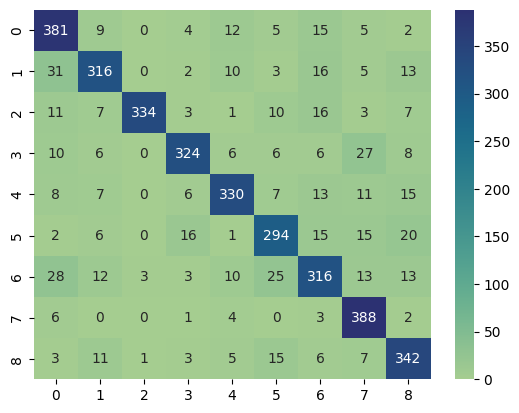

In [36]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure()
#cf_matrix = confusion_matrix(y_test, model.predict(X_test))
#plt.title('Confusion Matrix: {}'.format(name))
colormap = sns.color_palette("Blues",30)

sns.heatmap(cm, annot = True, fmt = 'g', cmap = 'crest')
plt.show()
    


In [37]:
!pip install scikit-plot



[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


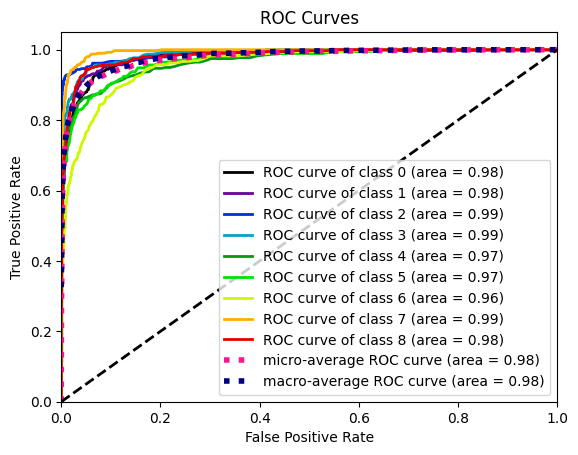

In [38]:
import scikitplot as skplt

skplt.metrics.plot_roc(y_test, tr.predict_proba(X_test))
#plt.title('ROC Curves: {}'.format(name))
plt.show()

In [39]:
from sklearn.metrics import accuracy_score
accuracy_1 = accuracy_score(y_test,y_pred) * 100
accuracy_1

84.02777777777779

In [46]:
from sklearn.preprocessing import StandardScaler

# Scaling features between -1 and 1
scaler = StandardScaler(with_mean=False)  # Pass with_mean=False to avoid centering sparse matrices
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)


In [52]:
!pip install mlxtend


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 8.0 MB/s eta 0:00:0000:0100:01

[notice] A new release of pip is available: 23.0.1 -> 23.3.1
[notice] To update, run: pip install --upgrade pip


In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
#from pandas_profiling import ProfileReport

%matplotlib inline
import pandas as pd 
import numpy as np 
import seaborn as sns 
import matplotlib.pyplot as plt 
#from pandas_profiling import ProfileReport
import math

#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant  
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#from statsmodels.tools.tools import add_constant  
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.datasets import make_classification
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
#from imblearn.over_sampling import SMOTE

#from sklearn.metrics import confusion_matrix,plot_roc_curve, classification_report
from sklearn.metrics import mean_absolute_error , mean_absolute_percentage_error , mean_squared_error , accuracy_score
from mlxtend.plotting import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.svm import SVC
from sklearn.impute import KNNImputer
from xgboost import XGBClassifier
#from catboost import CatBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [54]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt

Model:  Logistic Regression
Validation Accuracy:  0.8436111111111111
Training Accuracy:  0.9995833333333334


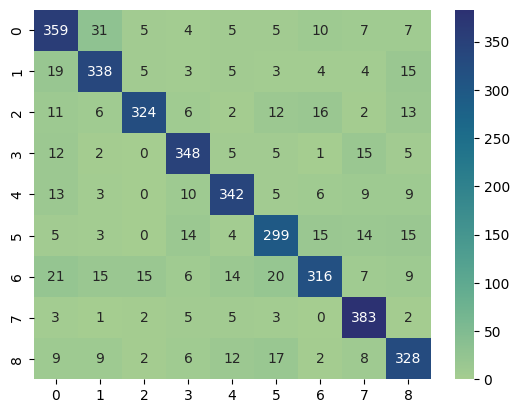

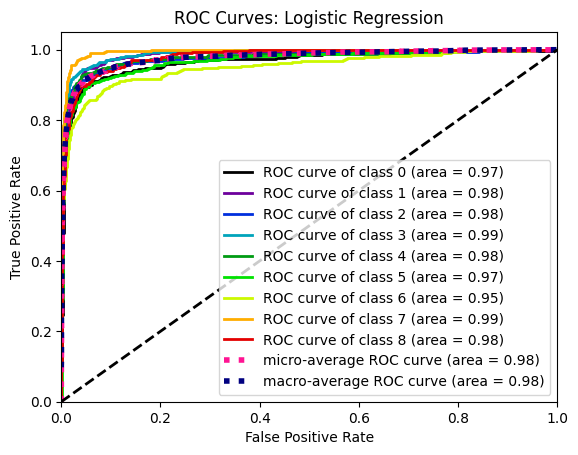

Model:  Decision Tree Classifier
Validation Accuracy:  0.6438888888888888
Training Accuracy:  0.9995833333333334


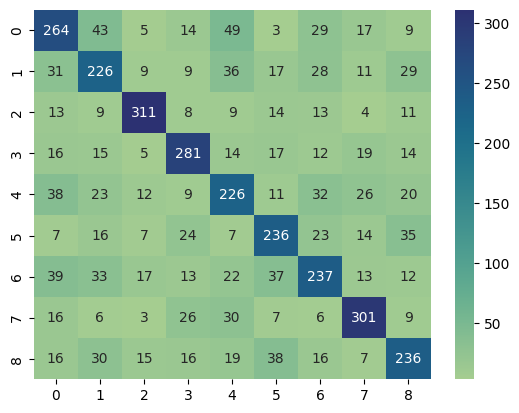

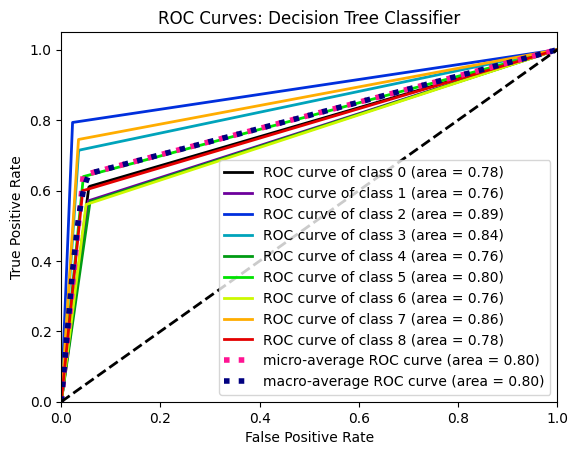

Model:  Random Forest
Validation Accuracy:  0.8363888888888888
Training Accuracy:  0.9995833333333334


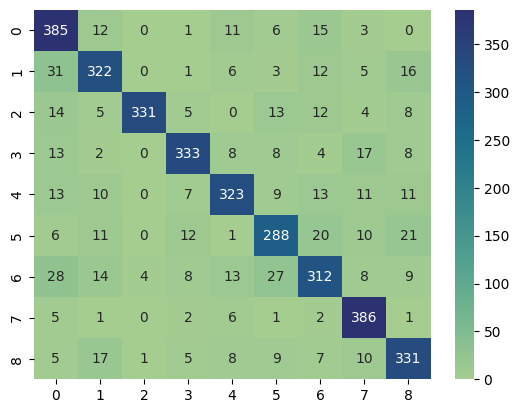

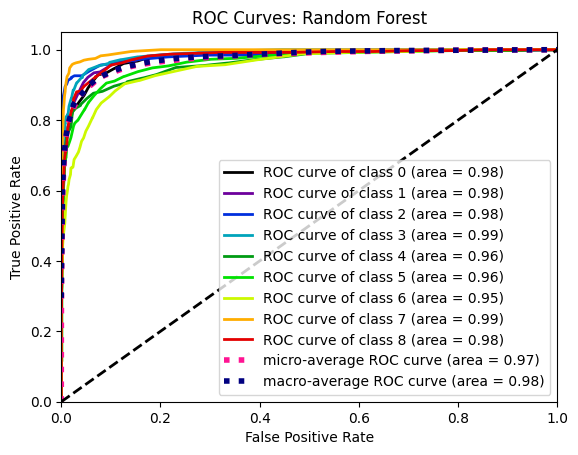

Model:  Ada Boost
Validation Accuracy:  0.6825
Training Accuracy:  0.6898611111111111


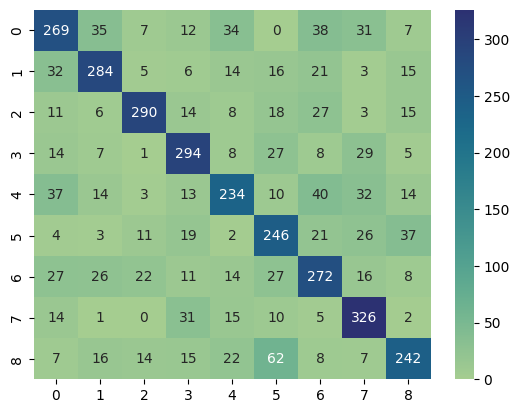

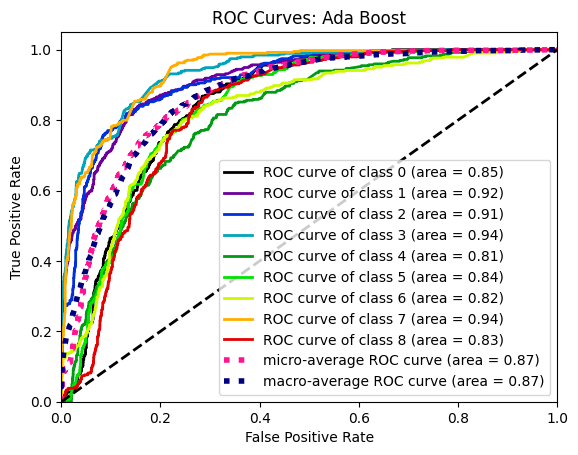

Model:  KNN
Validation Accuracy:  0.3680555555555556
Training Accuracy:  0.5395833333333333


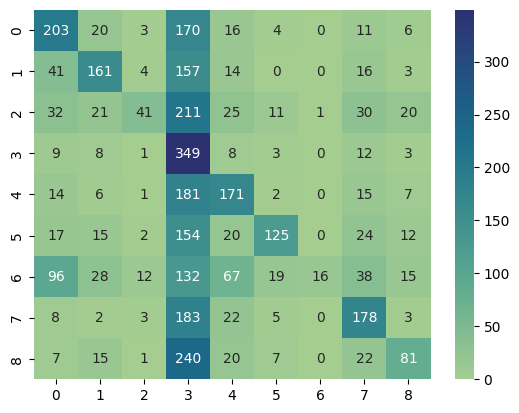

In [ ]:
# Models to be used for ML
models = [('Logistic Regression', LogisticRegression()),
          ('Decision Tree Classifier', DecisionTreeClassifier()),
          ('Random Forest', RandomForestClassifier()),
          #('Linear Discriminant Analyzer', LinearDiscriminantAnalysis()),
          ('Ada Boost', AdaBoostClassifier()),
          ('KNN', KNeighborsClassifier()),
          
          ]

models_score = []
for name, model in models:
    model = model #Model Object create
    model.fit(X_train, y_train)
    model.predict(X_test)
    models_score.append([name, accuracy_score(y_test, model.predict(X_test))])
    
    print("Model: ",name)
    print('Validation Accuracy: ', accuracy_score(y_test, model.predict(X_test)))
    print('Training Accuracy: ', accuracy_score(y_train, model.predict(X_train)))
    
    plt.figure()
    cf_matrix = confusion_matrix(y_test, model.predict(X_test))
    #plt.title('Confusion Matrix: {}'.format(name))
    colormap = sns.color_palette("Blues",30)

    sns.heatmap(cf_matrix, annot = True, fmt = 'g', cmap = 'crest')
    plt.show()
    
    import scikitplot as skplt

    skplt.metrics.plot_roc(y_test, model.predict_proba(X_test))
    plt.title('ROC Curves: {}'.format(name))
    plt.show()

In [ ]:
import xgboost as xgb
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

# define range of learning rates to try
learning_rates = [0.001, 0.01, 0.1]

# initialize lists to store results
train_scores = []
test_scores = []

# # define the best hyperparameters
params = {
    'n_estimators': 200,
    'max_depth': 7,
    'learning_rate': 0.1,
    'subsample': 1,
    'colsample_bytree': 0.8,
    'reg_alpha': 0.1, # L1 regularization
    'reg_lambda': 0.1 # L2 regularization
}

# loop over learning rates
for lr in learning_rates:
    # define the XGBoost classifier with updated learning rate
    params['learning_rate'] = lr
    xgb_clf = xgb.XGBClassifier(objective='multi:softmax', num_class=14, **params)
    
    # train the classifier
    xgb_clf.fit(train_vectors, train_labels)
    
    # make predictions on train and test data
    train_pred = xgb_clf.predict(train_vectors)
    test_pred = xgb_clf.predict(test_vectors)
    
    # calculate accuracy for train and test data
    train_acc = accuracy_score(train_labels, train_pred)
    test_acc = accuracy_score(test_labels, test_pred)
    
    # add scores to respective lists
    train_scores.append(train_acc)
    class_report = classification_report(train_labels, train_pred)
    print(class_report)
    test_scores.append(test_acc)
    class_report = classification_report(test_labels, test_pred)
    print(class_report)

# plot the results
plt.plot(learning_rates, train_scores, '-o', label='train')
plt.plot(learning_rates, test_scores, '-o', label='test')
plt.xscale('log')
plt.xlabel('learning rate')
plt.ylabel('accuracy')
plt.title('Accuracy vs. Learning Rate')
plt.savefig('XGBoost_accuracy1.png')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

confusion_matrix = confusion_matrix(test_labels, test_pred)
sns.heatmap(confusion_matrix, annot=True, cmap='Blues')
plt.savefig('XGBoost_confusion1.png')

In [ ]:
index = 100 # index of content from test data list
predict_index = xgb_clf.predict(test_vectors[index]) #provide test data
print('Predicted Category label: ')
print(predict_index) #predicted category label
print('Actual Category label: ')
print(test_labels[index]) # actual test data category label
print(test_content[index]) #test data content